# **Crop Recommendation**

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [210]:
cr=pd.read_csv('Crop_recommendation.csv')
cr.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [211]:
cr.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [212]:
cr.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [213]:
cr['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<ipython-input-214-5a9cbe5e8392>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cr.corr(),annot=True,cmap='RdBu')


<Axes: >

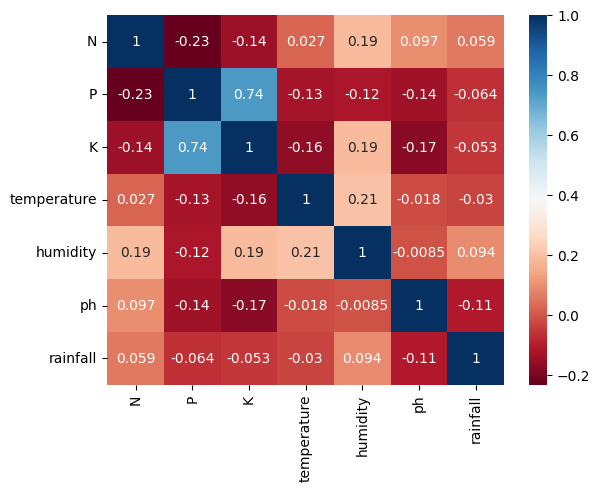

In [214]:
sns.heatmap(cr.corr(),annot=True,cmap='RdBu')

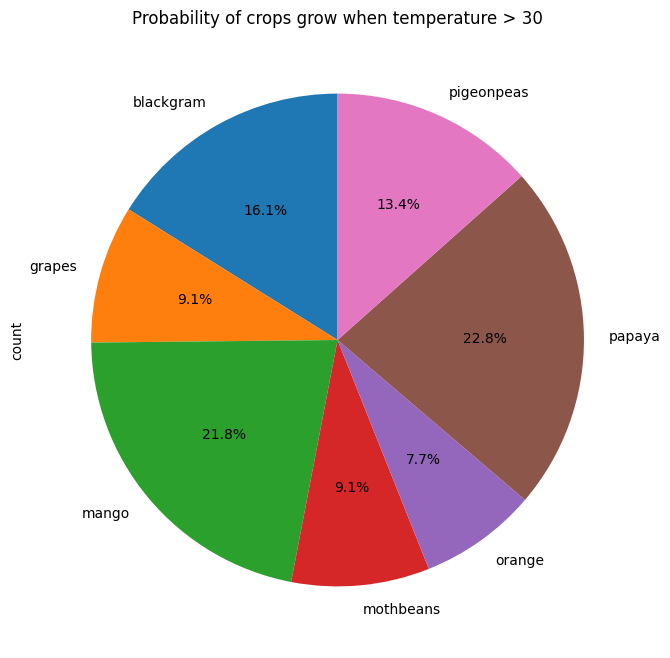

In [215]:
x = pd.DataFrame(pd.crosstab(cr.label[cr.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y='count',autopct='%1.1f%%',figsize=(8,8),legend=None, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

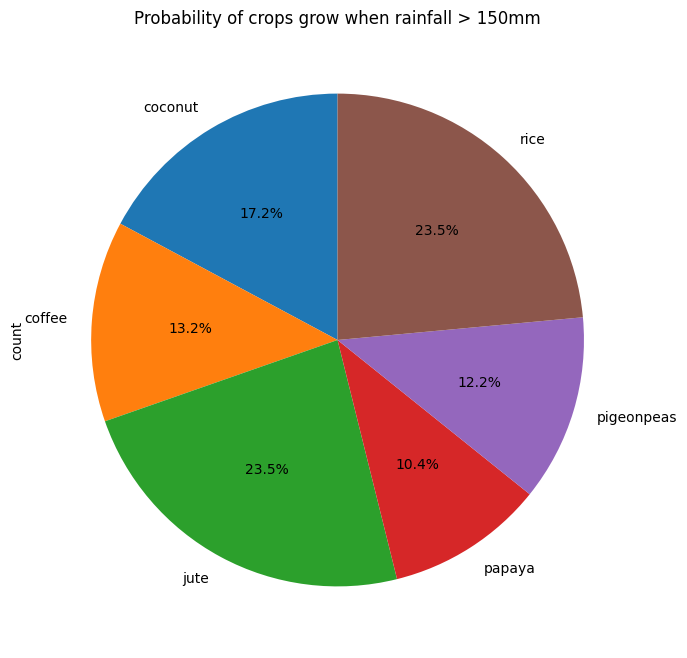

In [216]:
x1 = pd.DataFrame(pd.crosstab(cr.label[cr.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

In [217]:
cr['label']=cr['label'].astype('category')
cr['label']=cr['label'].cat.codes

In [218]:
X=cr.drop('label',axis=1)
y=cr[['label']]

In [219]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [220]:
y.head()

,label
0,20
1,20
2,20
3,20
4,20


In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [222]:
acc=[]
mod=[]

**Decision Tree Classifier**

In [223]:
model_1=DecisionTreeClassifier()
model_1.fit(X_train,y_train)
y_pred=model_1.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc.append(accuracy)
mod.append("Decision Tree")
print("Accuracy : ",accuracy)
print("\n\tClassification Report\n")
print(classification_report(y_test,y_pred))

Accuracy :  0.9863636363636363

	Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00  

**Support Vector**

In [224]:
model_2=SVC()
model_2.fit(X_train,y_train)
y_pred=model_2.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc.append(accuracy)
mod.append("Support Vector")
print("Accuracy : ",accuracy)
print("\n\tClassification Report")
print(classification_report(y_test,y_pred))

Accuracy :  0.9613636363636363

	Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       0.85      1.00      0.92        17
           7       1.00      1.00      1.00        14
           8       0.77      1.00      0.87        23
           9       0.95      1.00      0.98        20
          10       0.79      1.00      0.88        11
          11       1.00      0.86      0.92        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Random Forest**

In [225]:
model_3=RandomForestClassifier()
model_3.fit(X_train,y_train)
y_pred=model_3.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc.append(accuracy)
mod.append("Random Forest")
print("Accuracy : ",accuracy)
print("\n\tClassification Report")
print(classification_report(y_test,y_pred))

<ipython-input-225-ce3334000eca>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X_train,y_train)


Accuracy :  0.990909090909091

	Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.85      1.00      0.92        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00    

Text(95.72222222222221, 0.5, 'True Labels')

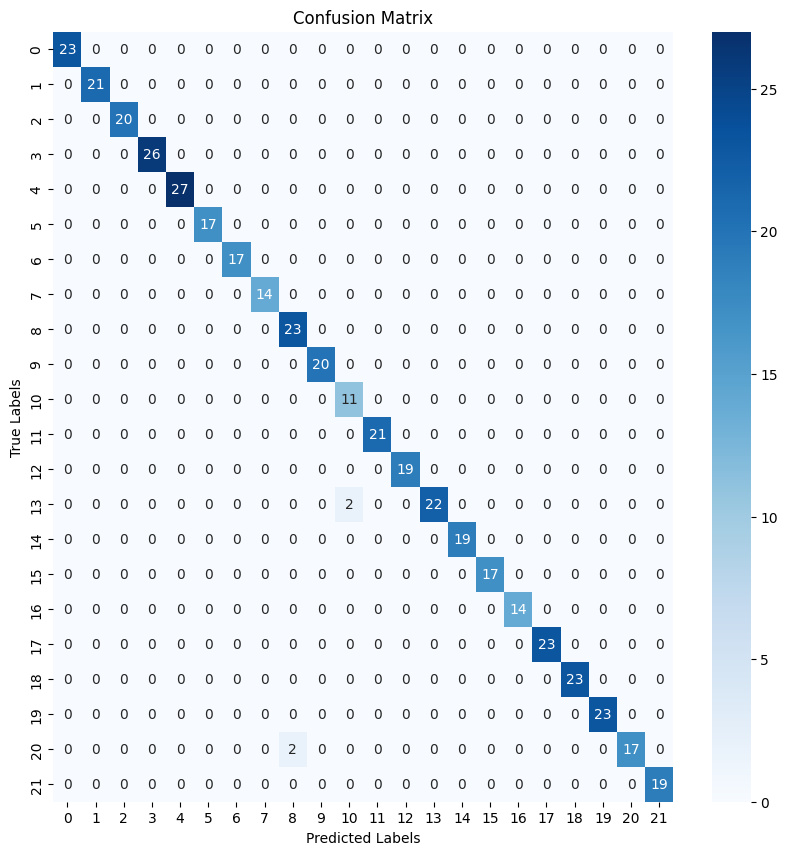

In [226]:
con=confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=model_3.classes_, index=model_3.classes_)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")


In [227]:
model_4=KNeighborsClassifier()
model_4.fit(X_train,y_train)
y_pred=model_4.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc.append(accuracy)
mod.append("KNearest Neighbors")
print("Accuracy : ",accuracy)
print("\n\tClassification Report")
print(classification_report(y_test,y_pred))

Accuracy :  0.9704545454545455

	Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.76      0.96      0.85        23
           9       0.95      1.00      0.98        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Axes: title={'center': 'Crop Recommendation Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

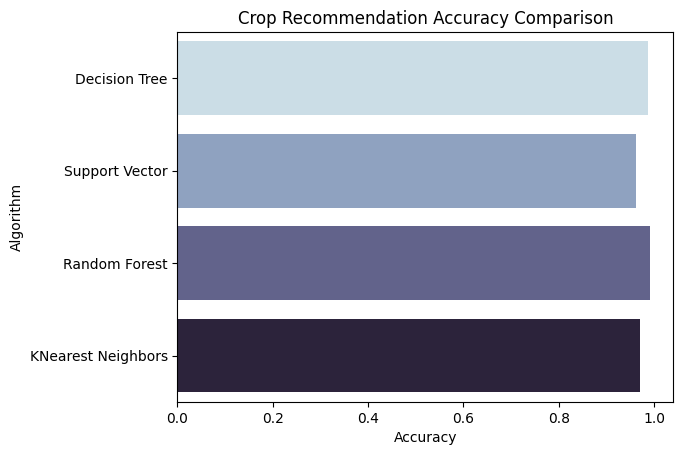

In [228]:
plt.title('Crop Recommendation Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = mod,palette='ch:s=.25,rot=-.25')

In [229]:
import pickle
pickle_out = open('Recommendation.pkl','wb')
pickle.dump(model_3,pickle_out)
pickle_out.close()

# **Crop Yield Prediction**

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [231]:
crop_data=pd.read_csv('crop_production.csv')
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [232]:
crop_data['Crop'] = crop_data['Crop'].str.lower()
crop_data['Crop'] = crop_data['Crop'].replace(['moth','peas  (vegetable)','bean','moong(green gram)','pome granet','water melon','cotton(lint)','gram'],['mothbeans','pigeonpeas','kidneybeans','mungbean','pomegranate','watermelon','cotton','chickpea'])
crop_data = crop_data[crop_data['Crop'].isin(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas','mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate','banana', 'mango', 'grapes', 'watermelon', 'apple','orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])]
crop_data = crop_data.drop(['State_Name','District_Name'],axis = 1)
crop_data

,Crop_Year,Season,Crop,Area,Production
2,2000,Kharif,rice,102.0,321.00
3,2000,Whole Year,banana,176.0,641.00
12,2001,Kharif,rice,83.0,300.00
18,2002,Kharif,rice,189.2,510.84
20,2002,Whole Year,banana,213.0,1278.00
...,...,...,...,...,...
246072,2014,Rabi,chickpea,198.0,203.00
246078,2014,Rabi,mungbean,64.0,40.00
246085,2014,Summer,maize,325.0,2039.00
246086,2014,Summer,rice,306.0,801.00


In [233]:
crop_data['Crop'].value_counts()

rice           15104
maize          13947
mungbean       10318
chickpea        7361
cotton          4518
banana          3209
jute            1453
mothbeans        878
papaya           483
mango            449
orange           271
grapes           129
blackgram        118
watermelon        85
pomegranate       66
lentil            31
kidneybeans       20
pigeonpeas        11
coffee             6
apple              4
Name: Crop, dtype: int64

In [234]:
crop_data.isnull().sum()


Crop_Year       0
Season          0
Crop            0
Area            0
Production    896
dtype: int64

In [235]:
crop_data = crop_data.dropna()
crop_data.head()

,Crop_Year,Season,Crop,Area,Production
2,2000,Kharif,rice,102.0,321.00
3,2000,Whole Year,banana,176.0,641.00
12,2001,Kharif,rice,83.0,300.00
18,2002,Kharif,rice,189.2,510.84
20,2002,Whole Year,banana,213.0,1278.00


In [236]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57565 entries, 2 to 246089
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop_Year   57565 non-null  int64  
 1   Season      57565 non-null  object 
 2   Crop        57565 non-null  object 
 3   Area        57565 non-null  float64
 4   Production  57565 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.6+ MB


In [237]:
crop_data['Season'].value_counts()

Kharif         26002
Rabi           12674
Summer          7764
Whole Year      4991
Autumn          3330
Winter          2804
Name: Season, dtype: int64

In [238]:
crop_data['Crop'].value_counts()

rice           15082
maize          13787
mungbean       10106
chickpea        7227
cotton          4382
banana          3133
jute            1408
mothbeans        786
papaya           483
mango            449
orange           271
grapes           129
blackgram         99
watermelon        85
pomegranate       66
lentil            31
kidneybeans       20
pigeonpeas        11
coffee             6
apple              4
Name: Crop, dtype: int64

In [239]:
crop_data['Crop']

2             rice
3           banana
12            rice
18            rice
20          banana
            ...   
246072    chickpea
246078    mungbean
246085       maize
246086        rice
246089        rice
Name: Crop, Length: 57565, dtype: object

<ipython-input-240-41a983144c7a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop_data.corr(),annot=True,cmap='coolwarm')


<Axes: >

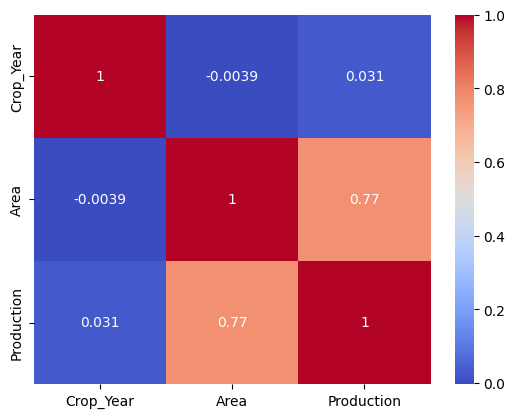

In [240]:
sns.heatmap(crop_data.corr(),annot=True,cmap='coolwarm')

In [241]:
crop_data['Crop']=crop_data['Crop'].astype('category')
crop_data['Crop']=crop_data['Crop'].cat.codes
crop_data.head()

<ipython-input-241-63336629019a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Crop']=crop_data['Crop'].astype('category')
<ipython-input-241-63336629019a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Crop']=crop_data['Crop'].cat.codes


,Crop_Year,Season,Crop,Area,Production
2,2000,Kharif,18,102.0,321.00
3,2000,Whole Year,1,176.0,641.00
12,2001,Kharif,18,83.0,300.00
18,2002,Kharif,18,189.2,510.84
20,2002,Whole Year,1,213.0,1278.00


In [242]:
crop_data['Season']=crop_data['Season'].astype('category')
crop_data['Season']=crop_data['Season'].cat.codes
crop_data.head()

<ipython-input-242-30563b77db10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Season']=crop_data['Season'].astype('category')
<ipython-input-242-30563b77db10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Season']=crop_data['Season'].cat.codes


,Crop_Year,Season,Crop,Area,Production
2,2000,1,18,102.0,321.00
3,2000,4,1,176.0,641.00
12,2001,1,18,83.0,300.00
18,2002,1,18,189.2,510.84
20,2002,4,1,213.0,1278.00


In [243]:
X=crop_data.drop('Production',axis=1)
y=crop_data[['Production']]

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [245]:
acc=[]
r2=[]
mod=[]

**Linear Regression**

In [246]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)
y_pred=model_1.predict(X_test)
error=round(mean_squared_error(y_test,y_pred),2)
score=r2_score(y_test,y_pred)
acc.append(round(error,2))
r2.append(score)
mod.append('Linear Regression')

**Support Vectors**

In [247]:
model_2=SVR()
model_2.fit(X_train,y_train)
y_pred=model_2.predict(X_test)
error=round(mean_squared_error(y_test,y_pred),2)
score=r2_score(y_test,y_pred)
acc.append(round(error,2))
r2.append(score)
mod.append('Support Vector')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Random Forest**

In [248]:
model_3=RandomForestRegressor()
model_3.fit(X_train,y_train)
y_pred=model_3.predict(X_test)
error=round(mean_squared_error(y_test,y_pred),2)
score=r2_score(y_test,y_pred)
acc.append(round(error,2))
r2.append(score)
mod.append('Random Forest')

<ipython-input-248-c2b7f00063f6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X_train,y_train)


**Decision Tree**

In [249]:
model_4=DecisionTreeRegressor()
model_4.fit(X_train,y_train)
y_pred=model_4.predict(X_test)
error=round(mean_squared_error(y_test,y_pred),2)
score=r2_score(y_test,y_pred)
acc.append(round(error,2))
r2.append(score)
mod.append('Decision Tree')

<Axes: title={'center': 'Crop Production R2 Comparison'}, xlabel='R2_score', ylabel='Algorithm'>

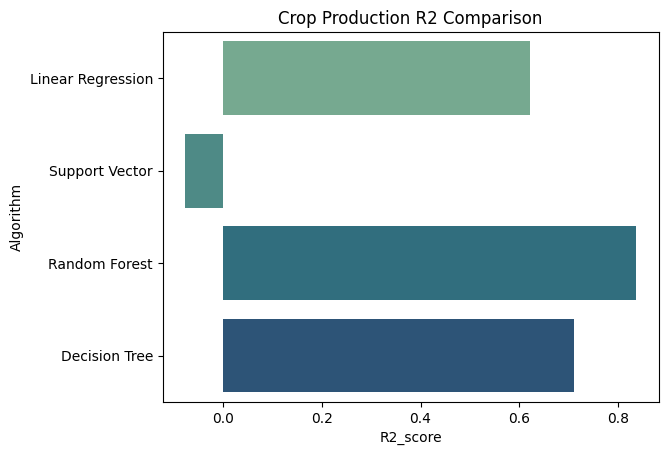

In [251]:
plt.title('Crop Production R2 Comparison')
plt.xlabel('R2_score')
plt.ylabel('Algorithm')
sns.barplot(x = r2,y = mod,palette='crest')

In [252]:
comparison=pd.DataFrame({'Model':mod,'MSE':error,'R2 Score':r2})
comparison.head()

,Model,MSE,R2 Score
0,Linear Regression,4.871342e+09,0.620749
1,Support Vector,4.871342e+09,-0.075651
2,Random Forest,4.871342e+09,0.835709
3,Decision Tree,4.871342e+09,0.709428


In [253]:
import pickle
pickle_out = open('Production.pkl','wb')
pickle.dump(model_3,pickle_out)
pickle_out.close()